<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/Capstone_Proyect_12526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project MsFE
## Proyect: Deep Reinformcent Learning for Cryptocurrency Trading
## Student Group: 12526
## Team Members:


*   Jose Daniel Isidoro Reyes
*   Jayakumar G



# Data Retrieval

In [4]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=/usr
!make
!make install

%cd /content/
!pip install TA-Lib

!pip install ccxt

--2026-01-07 14:20:31--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.12.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2026-01-07 14:20:31--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:d95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2026-01-07 14:20:32--  http://phoenixnap.dl.

In [5]:
import ccxt
import pandas as pd
import time
from datetime import datetime
import talib

exchange = ccxt.coinbase({'enableRateLimit': True})

symbol =  'ETH/USD'
timeframe =  '1m'
limit  =  800

# Data Retrieval Configuration
START_DATE =  '2020-01-01 00:00:00'
END_DATE = '2025-01-01 00:00:00'

start_dt = datetime.strptime(START_DATE, '%Y-%m-%d %H:%M:%S')
end_dt   = datetime.strptime(END_DATE, '%Y-%m-%d %H:%M:%S')

since = exchange.parse8601(start_dt.strftime('%Y-%m-%dT%H:%M:%SZ'))
end_ts = exchange.parse8601(end_dt.strftime('%Y-%m-%dT%H:%M:%SZ'))


data =  []

while since < end_ts:
    ohlcv =  exchange.fetch_ohlcv(
        symbol,
        timeframe  =  timeframe,
        since  =  since,
        limit  =  limit)

    for candle in ohlcv:
        if candle[0] <= end_ts:
            data.append(candle)

    since  =  ohlcv[-1][0] + 1
    time.sleep(0.35)
df = pd.DataFrame(data,
                  columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'] )
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace =  True)

# Technical Indicators
df['rsi'] =  talib.RSI(df['close'])
df['cci'] = talib.CCI(df['high'], df['low'], df['close'])
df['roc'] =  talib.ROC(df['close'])
# Directional Movement Index
df['dx'] = talib.DX(df['high'], df['low'], df['close'])
# Ultimate Ocsillator
df['ultosc'] =  talib.ULTOSC(df['high'], df['low'], df['close'])
df['willr'] =  talib.WILLR(df['high'], df['low'], df['close'])
# On Balance Volume
df['obv'] =  talib.OBV(df['close'], df['volume']).astype(float)
# Hilbert Transform - Dominant Cycle Phase
df['ht_dcphase'] =  talib.HT_DCPHASE(df['close'])

# Technical Indicators suggested Chun, J. H., & Lee, S. J. (2025)
upper, middle, lower =  talib.BBANDS(df['close'])
df['BANDb'] =  (df['close']  -lower) / (upper - lower)
df["BANDWidth"] =  (upper - lower) / middle
df['DMI'] =  talib.DX(df['high'], df['low'], df['close'])
df['EOM'] =  ((df['high'] + df['low'])/2 - (df['high'].shift(1) + df['low'].shift(1))/2) / (df['volume'] / (df['high'] - df['low']))
df['CO'] = talib.ADOSC(df['high'], df['low'], df['close'], df['volume'])
df['TRIX'] = talib.TRIX(df['close'])
df['FastK'], df['FastD'] = talib.STOCHF(df['high'], df['low'], df['close'])

df.dropna(inplace  =  True)
df

,open,high,low,close,volume,rsi,cci,roc,dx,ultosc,...,obv,ht_dcphase,BANDb,BANDWidth,DMI,EOM,CO,TRIX,FastK,FastD
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:28:00,129.60,129.64,129.55,129.59,52.761415,85.781665,128.996199,0.848249,93.283060,71.319750,...,9.350526e+02,148.767139,0.709285,0.007164,93.283060,0.000094,217.858143,0.005693,83.333333,90.277778
2020-01-01 01:29:00,129.64,129.98,129.63,129.81,186.919987,88.175184,143.202033,1.027317,94.957041,72.716491,...,1.121973e+03,147.710974,0.823734,0.006247,94.957041,0.000393,188.052311,0.006558,81.521739,88.285024
2020-01-01 01:30:00,129.80,129.81,129.80,129.81,154.244771,88.175184,118.915231,0.870308,94.957041,71.213913,...,1.121973e+03,146.030776,0.735775,0.004972,94.957041,0.000000,207.841233,0.007489,76.388889,80.414654
2020-01-01 01:31:00,129.90,130.08,129.90,129.96,70.353882,89.564326,123.640585,0.884956,95.898455,69.074672,...,1.192326e+03,146.781056,0.875881,0.003813,95.898455,0.000473,189.580268,0.008493,82.857143,80.255924
2020-01-01 01:32:00,129.96,129.96,129.71,129.82,135.980666,80.105524,85.812751,0.643461,71.619184,63.793489,...,1.056346e+03,149.893028,0.546391,0.003654,71.619184,-0.000285,159.683315,0.009514,50.943396,70.063143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:56:00,3334.97,3335.86,3333.72,3333.74,15.692699,52.947207,51.629584,0.007500,22.207549,49.295286,...,-4.435605e+06,205.236084,0.232724,0.000900,22.207549,0.066821,3.611216,-0.000524,3.196347,26.842691
2024-12-31 23:57:00,3333.74,3334.25,3330.61,3332.46,62.055571,48.173894,-100.613940,-0.022501,6.455004,49.358788,...,-4.435667e+06,209.523894,0.054815,0.000945,6.455004,-0.138431,1.207350,-0.000430,35.238095,28.357699
2024-12-31 23:58:00,3332.46,3332.69,3331.10,3331.12,6.619582,43.729330,-158.716578,-0.083386,6.455004,42.440168,...,-4.435673e+06,215.174181,0.092592,0.001539,6.455004,-0.128505,-1.939053,-0.000360,9.714286,16.049576


In [8]:
df.to_csv("eth_min_df.csv")

## Exploratory Data Analysis

In [10]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2627671 entries, 2020-01-01 01:28:00 to 2025-01-01 00:00:00
Data columns (total 21 columns):
 #   Column      Dtype  
---  ------      -----  
 0   open        float64
 1   high        float64
 2   low         float64
 3   close       float64
 4   volume      float64
 5   rsi         float64
 6   cci         float64
 7   roc         float64
 8   dx          float64
 9   ultosc      float64
 10  willr       float64
 11  obv         float64
 12  ht_dcphase  float64
 13  BANDb       float64
 14  BANDWidth   float64
 15  DMI         float64
 16  EOM         float64
 17  CO          float64
 18  TRIX        float64
 19  FastK       float64
 20  FastD       float64
dtypes: float64(21)
memory usage: 441.0 MB


In [11]:
# Missing Values
df.isnull().sum()

,0
open,0
high,0
low,0
close,0
volume,0
rsi,0
cci,0
roc,0
dx,0
ultosc,0


In [12]:
# Duplicated values
df.duplicated().sum()

np.int64(0)

In [13]:
#df["date"] =  pd.to_datetime(df["date"])
#df =  df.set_index("date")

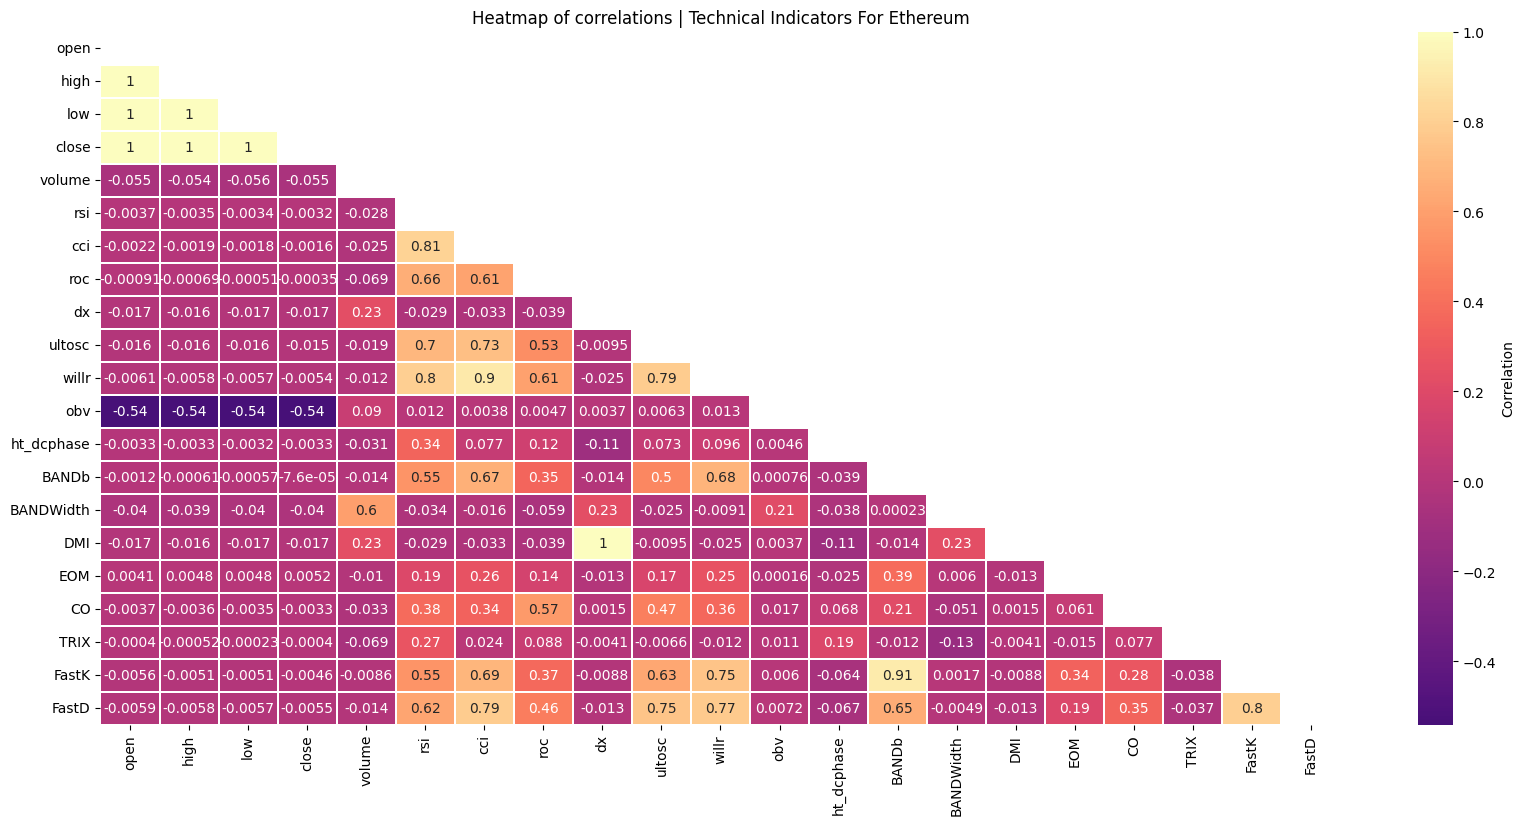

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr =  df.select_dtypes(include  =  "number").corr()
mask =  np.triu(np.ones_like(corr, dtype  =  bool))
plt.figure(figsize =  (20, 9))
sns.heatmap(
    corr,
    mask  =  mask,
    cmap  = "magma",
    annot =  True,
    linewidth  =  0.3,
    center = 0,
    cbar_kws  = {'label': 'Correlation'}

    )
plt.title("Heatmap of correlations | Technical Indicators For Ethereum")
plt.show()

Text(0.5, 1.0, 'ETH/USD Historical Price 2020-2025 - 1 minute interval data')

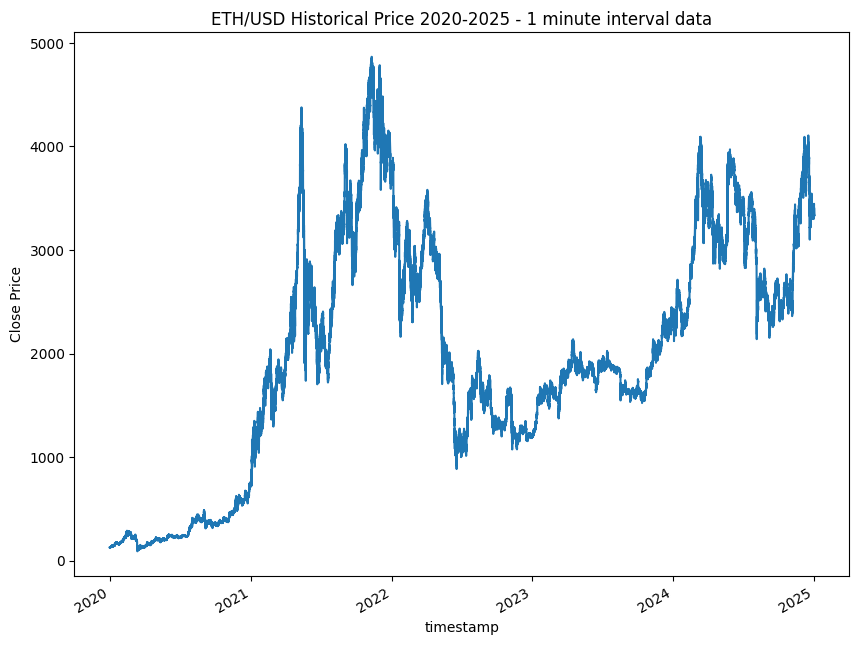

In [20]:
plt.figure(figsize = (10, 8))
df['close'].plot()
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('ETH/USD Historical Price 2020-2025 - 1 minute interval data')

In [22]:
df["returns"] = df["close"].pct_change()

Text(0.5, 1.0, 'Returns for ETH/USD | 1-minute')

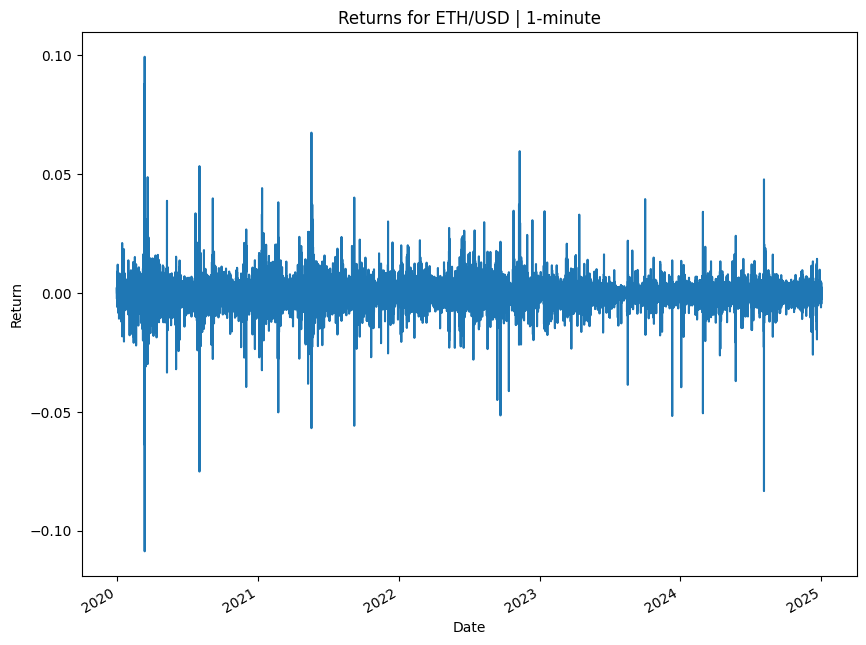

In [25]:
plt.figure(figsize =   (10, 8))
df["returns"].plot()
plt.xlabel('Date')
plt.ylabel('Return')
plt.title("Returns for ETH/USD | 1-minute")

# Data Preprocessing

# Environment Design

In [ ]:
# OpenIA Gym Framework

## Training

## Validation

## Backtesting